# Extended Kalman Filter for Planar Surfaces

On our previous post, a localization method was explained for the case of differential drive robots. Today, this localization is going to be  improved through the well-known Extended Kalman filter. 

Through Kalman filter the robot's position estimation is going to be improved considering not only odometry information but also camera information.

Let's consider our robot's state model : 

$$x_{k+1|k} = x_{k} + \Delta R cos(\phi_{k}+\frac{\Delta\theta}{2})$$
$$y_{k+1|k} = y_{k} + \Delta R sin(\phi_{k}+\frac{\Delta\theta}{2})$$
$$\phi_{k+1|k} = \phi{k} + \Delta\theta$$ 

On this first approach the considered measurements for the kalman filter are related with the optical markers position. On the future, the Kalman filter will run on SLAM considering the lego block's position an IMU sensor information.

From the camera we can measure the distance(d) and the angle($\alpha$) with respect to the camera and applying a Transalation matrix get the (d,$\alpha$) in robot frame : 

$$X_{optm}^{robot} = T_{Cam}^{robot}X_{optm}^{Cam}$$

On the other hand, assuming we have a map with the optical markers position and as we are able to estimate robot's position we can compute the estimated measurements of the relative distance to the robot($d_{est}$) and estimated angle measurement ($\alpha_{est}$) : 

$$d_{est} = \sqrt{(Xmark- x_{k+1})^{2} + (Ymark- y_{k+1})^{2}} $$
$$\alpha_{est} = atan(\frac{Ymark-y_{k+1}}{Xmark-x_{k+1}}) - \phi_{k+1}$$


We can estimate the measurement prediction error easily then : 

$$\Delta Er = Xreal_{optmar} - Xest_{optmar}$$

Knowing the error and the robot position estimation we can improve the robot's state estimation as : 

$$X_{k+1|k+1} = X_{k+1|k} + K_{k}\Delta Er$$

Now, we need to compute the K paramater for instance k, known as Kalman's gain:

$$K_{k} = P_{k+1|k}H^{T}(HP_{k+1|K}H^{T} + R)$$

$P_{k+1|k}$ is the system's covariance estimation computed as : 

$$P_{k+1|k} = AP_{k}A^{T} + \sigma_{encoders}BB^{T} + Q $$

As the robot's dynamic model is non linear, A and B are the jacobians of the function : 

$$A = \frac{\partial X_{k+1}}{\partial X}$$
$$B = \frac{\partial X_{k+1}}{\partial U}$$

been X the the state of the robot(x,y,$\phi$) and U the controllers($\Delta wR, \Delta wL$), Q is the model's noise, $P_{k}$ the previous system's covariance matrix andf $\sigma_{encoders}$ is the noise variance of the encoders of the motors.

Going back to the function to compute $P_{k+1|k}$, H is the jacobian of the function to estimate measurements:

$$H = \frac{\partial Z}{\partial X}$$

been $Z = (d_{est},\alpha_{est})$

and R is the noise variance matrix of the measurements.

Finally, we also update the P value : 

$$P_{k+1} = P_{k+1|k+1}  = (I - KH)P_{k+1|k}(I - KH)^{T} + KRK^{T}$$

Following these steps on each iteration we were able to improve the robot's position estimation and that way improve the localization. This extended Kalman filter will be added to the mapping creating a simple surface SLAM algorithm.


The obtained solution app









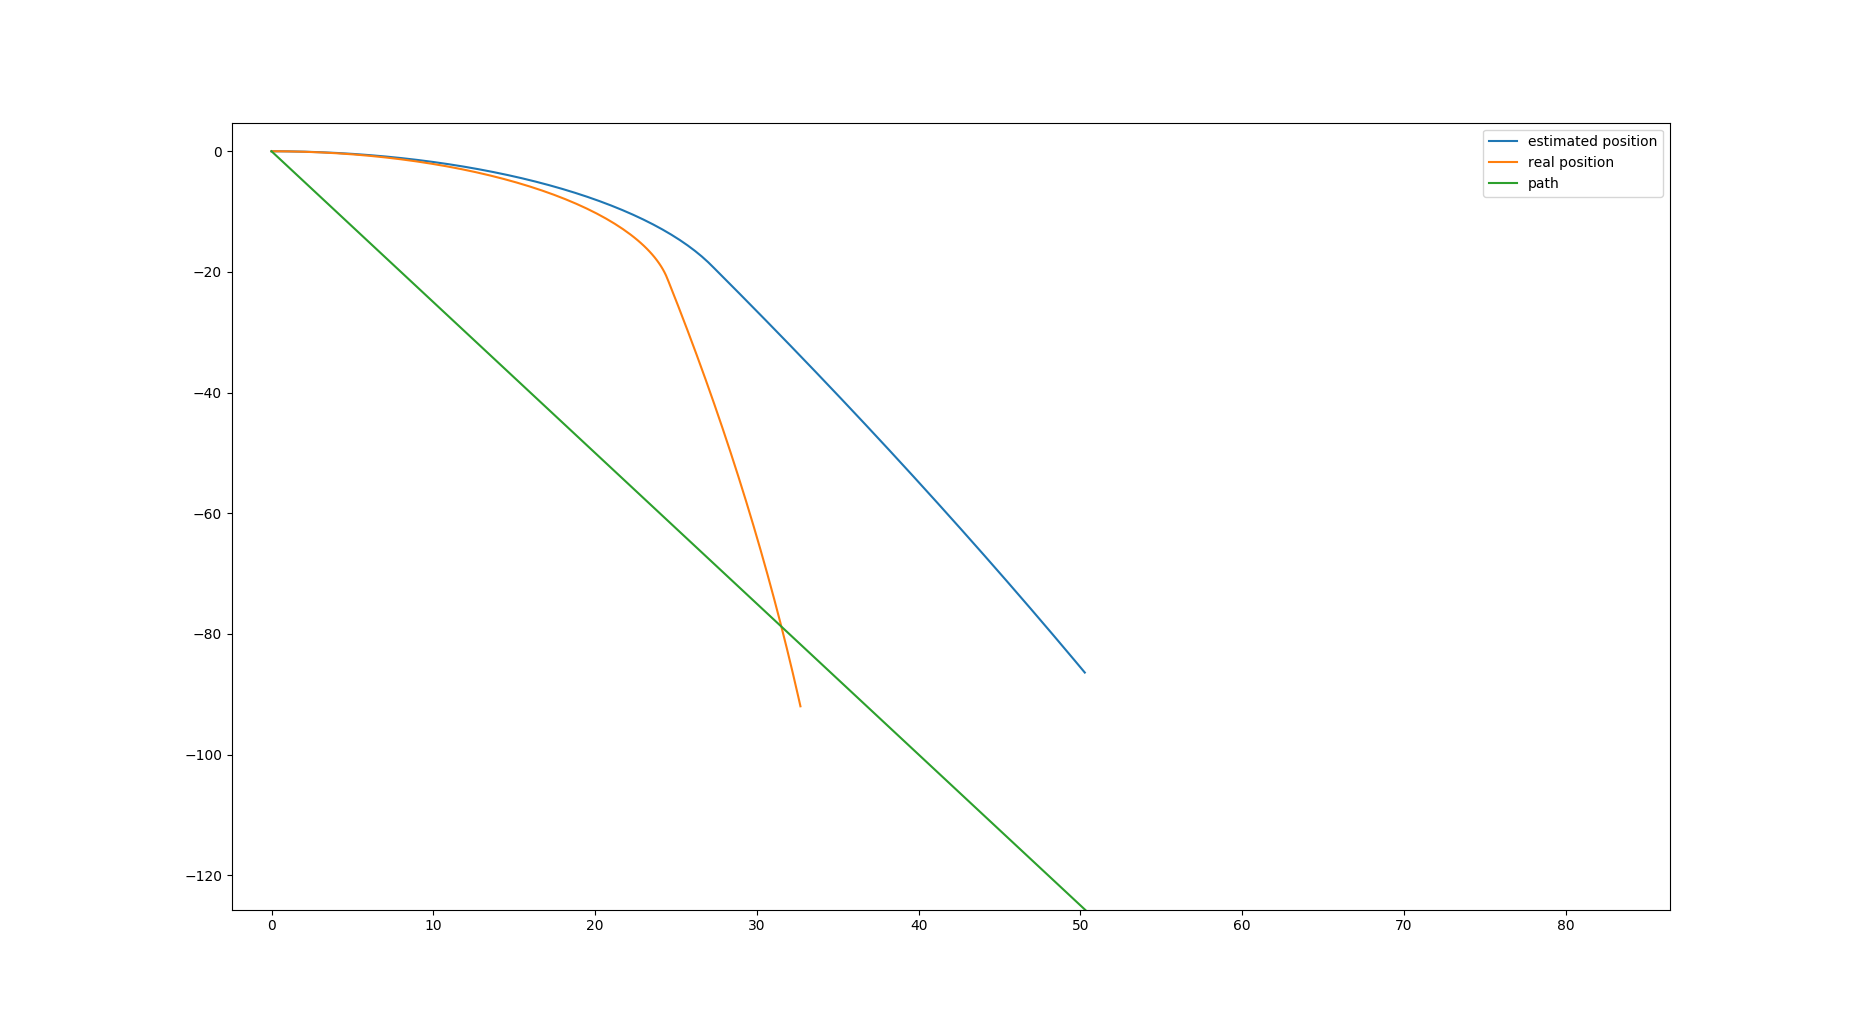

In [1]:
from IPython.display import Image
Image(filename='odometry.png')

And the obtained solution applying Extended Kalman Filter : 

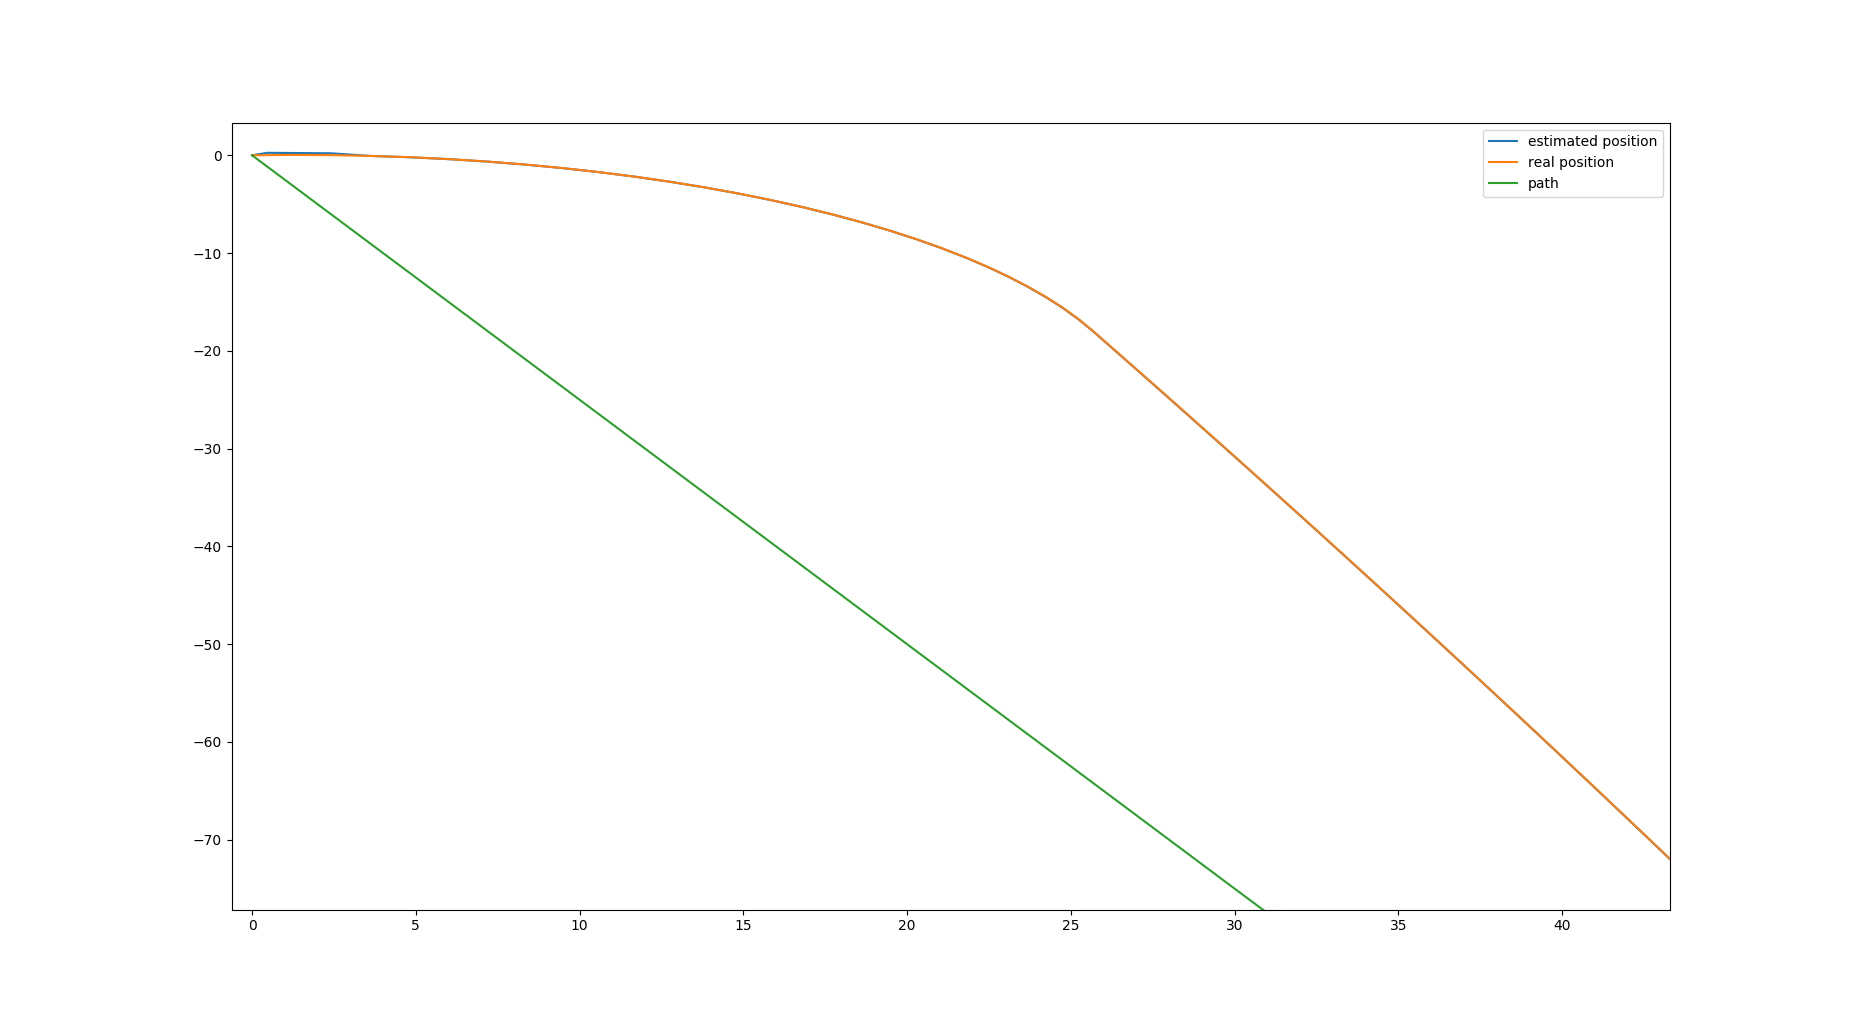

In [2]:
from IPython.display import Image
Image(filename='kalman.png')